In [ ]:
import scipy.integrate
import numpy as np
import sympy
import matplotlib.pyplot as plt


In [ ]:
#定義函數&變數
t=sympy.symbols('t')
x=sympy.Function('x')

#寫出ODE
ode=x(t).diff(t)+x(t)+1
sympy.Eq(ode)

In [ ]:
#解ODE
S_g=sympy.dsolve(ode)
S_g

In [ ]:
#帶入初始值找特解
#初始值設成字典
ini={x(0):10}

#rhs表示eq右邊,subs表示把符號t換成其他東西
S_p=sympy.Eq(S_g.lhs.subs(t,0).subs(ini),S_g.rhs.subs(t,0))
S_p

In [ ]:
#實際解出未知常數,記得加上"[]"，這樣吐出來的ini_con才是dictionary,帶回去才方便
a=sympy.solve([S_p])
a

In [ ]:
#帶回原本的解
S_k=S_g.subs(a)
S_k

In [ ]:
#解一階線性ode v'=Av
def f(v,t):
    x,y=v
    return [np.cos(t),-x]
#這裡A=diag(2,1)

In [ ]:
#解ode  (-1,1)為初始條件  t是f的變數 這裡f不dep on t
t=np.linspace(0,10,101)
sol=scipy.integrate.odeint(f,(0,1),t)

In [ ]:
plt.plot(t, sol[:, 0], 'b', label='x(t)')
plt.plot(t, sol[:, 1], 'g', label='y(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

0.5

In [126]:
#Define the matrix for ode
def A(X,t,a,b,w):
    x,y=X
    return (y,(-a-b*np.cos(w*t))*x)  
#compute the value of the fundamental matrix at 0 and T
def fund_matrix(a,b,w):
    t=np.array([0,2*np.pi/w])
    X_1=scipy.integrate.odeint(A,(1,0),t,args=(a,b,w))
    X_2=scipy.integrate.odeint(A,(0,1),t,args=(a,b,w))
    return np.stack((X_1[1,],X_2[1,]))

In [127]:
def phi(a,b,w):
    M=fund_matrix(a,b,w)
    return np.trace(M)

In [ ]:
T=np.empty(0)
for s in a:
    if abs(abs(phi(s,0))-2)<10**(-5):
        T=np.append(T,s)
T

In [132]:
a=np.arange(0,5,0.01)
b=np.arange(0,5,0.01)
w=2
Tongue_a=[]
Tongue_b=[]
for s in a:
    print(s)
    for l in b:
        if abs(abs(phi(s,l,w)-2))<10**(-5):
            Tongue_a.append(s)
            Tongue_b.append(l)



0.0
0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35000000000000003
0.36
0.37
0.38
0.39
0.4
0.41000000000000003
0.42
0.43
0.44
0.45
0.46
0.47000000000000003
0.48
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.5700000000000001
0.58
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.6900000000000001
0.7000000000000001
0.71
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.8
0.81
0.8200000000000001
0.8300000000000001
0.84
0.85
0.86
0.87
0.88
0.89
0.9
0.91
0.92
0.93
0.9400000000000001
0.9500000000000001
0.96
0.97
0.98
0.99
1.0
1.01
1.02
1.03
1.04
1.05
1.06
1.07
1.08
1.09
1.1
1.11
1.12
1.1300000000000001
1.1400000000000001
1.1500000000000001
1.16
1.17
1.18
1.19
1.2
1.21
1.22
1.23
1.24
1.25
1.26
1.27
1.28
1.29
1.3
1.31
1.32
1.33
1.34
1.35
1.36
1.37
1.3800000000000001
1.3900000000000001
1.4000000000000001
1.41
1.42
1.43
1.44
1.45
1.46
1.47
1.48
1.49
1.5
1.51
1.52
1.53
1.54
1.55
1.56
1.

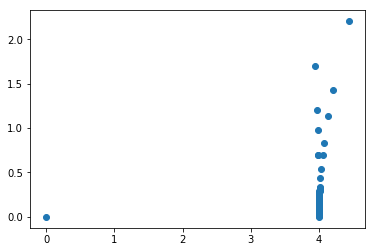

In [ ]:
def sol(a,b):
    t=np.arange(0,100,0.1)
    X_1=scipy.integrate.odeint(A,(1,0),t,args=(a,b))
    X_2=scipy.integrate.odeint(A,(0,1),t,args=(a,b))
    plt.plot(t,X_2[:,0])
    plt.plot(t,X_1[:,0])
    plt.show()

In [100]:
len(Tongue_a)

41

In [ ]:
b[20:35]